## Merge of the dataset of oscar and movies budet/popu/rating 

the_oscar_award.csv comes from:  https://www.kaggle.com/datasets/unanimad/the-oscar-award
movie_stat.csv comes from : https://github.com/danielgrijalva/movie-stats/blob/master/movies.csv

In [2]:
import pandas as pd
import numpy as np

In [5]:
# oscars dataset : drop useless columns, change name to match the other datasets, keep only 4 categories of nominations
oscars = pd.read_csv('data/the_oscar_award.csv')
#oscars = oscars[oscars['category'].str.contains('ACTOR|ACTOR IN A SUPPORTING ROLE|ACTRESS|ACTRESS IN A SUPPORTING ROLE|DIRECTING', regex=True)]
oscars.rename(columns={'film': 'movie_name'}, inplace=True)
oscars.rename(columns={'year_film': 'Movie release date'}, inplace=True)

oscars['movie_name'] = oscars['movie_name'].str.lower().str.replace(' ', '_')

oscars

,Movie release date,year_ceremony,ceremony,category,name,movie_name,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,the_noose,False
1,1927,1928,1,ACTOR,Emil Jannings,the_last_command,True
2,1927,1928,1,ACTRESS,Louise Dresser,a_ship_comes_in,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th_heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,sadie_thompson,False
...,...,...,...,...,...,...,...
10884,2023,2024,96,WRITING (Original Screenplay),Written by Celine Song,past_lives,False
10885,2023,2024,96,JEAN HERSHOLT HUMANITARIAN AWARD,NaN,NaN,True
10886,2023,2024,96,HONORARY AWARD,"To Angela Bassett, who has inspired audiences ...",NaN,True
10887,2023,2024,96,HONORARY AWARD,"To Mel Brooks, for his comedic brilliance, pro...",NaN,True


In [6]:
# need to have only one row per movie: addition of a 'num_nominations' column to count the number of nominations per movie, 
# and a 'winner' column to know if the movie won the category and by who --> will be matched with the actors we are interested in

oscars_to_merge = oscars.groupby(['movie_name'], as_index=False).agg({
    'Movie release date': 'first',
    'category': lambda x: ', '.join(f"{cat}: {name}" for cat, name in zip(x, oscars.loc[x.index, 'name'])),
    'winner': lambda x: ', '.join(oscars.loc[x.index, 'name'][oscars.loc[x.index, 'winner']]),
    'category': 'count'
}).rename(columns={'category': 'num_nominations'})

oscars_to_merge['winner'].value_counts()

winner
                                                                                                                                                                                                                             3713
Walt Disney, Producer                                                                                                                                                                                                          22
Metro-Goldwyn-Mayer                                                                                                                                                                                                            10
France                                                                                                                                                                                                                          8
Italy                                                                                    

In [7]:
movie_stats = pd.read_csv('data/movie_stats.csv')
movie_stats.rename(columns={'name': 'movie_name'}, inplace=True)
movie_stats.rename(columns={'year': 'Movie release date'}, inplace=True)
movie_stats['movie_name'] = movie_stats['movie_name'].str.lower().str.replace(' ', '_')

def convert_to_datetime(date):
    # Check if the date is just a year (4 digits) and convert it to 'yyyy-01-01' format
    if len(str(date)) == 4 and str(date).isdigit():  # Only year (e.g., 1988)
        return pd.to_datetime(str(date) + '-01-01')
    else:
        return pd.to_datetime(date, errors='coerce')  # Convert if it's in a full date format

movie_stats['Movie release date'] = movie_stats['Movie release date'].apply(convert_to_datetime)
movie_stats['Movie release date'] = movie_stats['Movie release date'].dt.year

movie_stats


,movie_name,rating,genre,Movie release date,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,the_shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,the_blue_lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,star_wars:_episode_v_-_the_empire_strikes_back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,more_to_life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,dream_round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,saving_mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,it's_just_us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [8]:
# CMU Movie dataset : kept all columns, change name to match the other datasets

original_data = pd.read_csv('data/movie.metadata.tsv', sep='\t', names= ['Wikipedia movie ID', 'Freebase movie ID', 'Movie name', 'Movie release date', 'Movie box office revenue', 'Movie runtime', 'Movie languages', 'Movie countries', 'Movie genres'])
original_data.rename(columns={'Movie name': 'movie_name'}, inplace=True)

original_data['movie_name'] = original_data['movie_name'].str.lower().str.replace(' ', '_')

original_data['Movie release date'] = original_data['Movie release date'].apply(convert_to_datetime)
original_data['Movie release date'] = original_data['Movie release date'].dt.year

original_data

,Wikipedia movie ID,Freebase movie ID,movie_name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,ghosts_of_mars,2001.0,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,getting_away_with_murder:_the_jonbenét_ramsey_...,2000.0,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,brun_bitter,1988.0,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,white_of_the_eye,1987.0,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,a_woman_in_flames,1983.0,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,mermaids:_the_body_found,2011.0,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,knuckle,2011.0,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,another_nice_mess,1972.0,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,the_super_dimension_fortress_macross_ii:_lover...,1992.0,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


In [9]:
# merged original and movie stats 
merged = pd.merge(original_data, movie_stats, on=['movie_name', 'Movie release date'], how='left')
final_merged_data = merged.merge(oscars_to_merge, on=['movie_name', 'Movie release date'], how='left')

# drop irelevant columns
final_merged_data.drop(columns=['Wikipedia movie ID', 'genre', 'released', 'country', 'runtime', 'rating', 'writer'], inplace=True)

# #rename for homogeneity
final_merged_data.rename(columns={'movie_name': 'Movie name', 'score': 'Movie score', 'votes': 'Movie votes', 'director': 'Movie director', 'star': 'Movie star', 'budget': 'Movie budget', 'gross': 'Movie gross', 'company': 'Movie company', 'num_nominations': 'Number of nomination', 'winner': 'Nomination winner'}, inplace=True)

# addition of the budget/revenues ratio 
final_merged_data['Revenue/Budget ratio'] = final_merged_data['Movie box office revenue'] / final_merged_data['Movie budget']

# change of type 
final_merged_data['Movie release date'] = final_merged_data['Movie release date'].astype('Int64')

# cleaner format of the columns
def get_key_values(x):
     return ', '.join(x.values())

final_merged_data['Movie genres'] = final_merged_data['Movie genres'].apply(eval).apply(get_key_values)
#final_merged_data['Movie languages'] = final_merged_data['Movie languages'].apply(eval).apply(get_key_values) # get issue when saving to csv: 'utf-8' codec can't encode characters in position 33-44: surrogates not allowed"
final_merged_data['Movie countries'] = final_merged_data['Movie countries'].apply(eval).apply(get_key_values)

final_merged_data.to_csv('data/final_merged_data.csv', index=False)
final_merged_data


,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie score,Movie votes,Movie director,Movie star,Movie budget,Movie gross,Movie company,Number of nomination,Nomination winner,Revenue/Budget ratio
0,/m/03vyhn,ghosts_of_mars,2001,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",4.9,52000.0,John Carpenter,Natasha Henstridge,28000000.0,14010832.0,Screen Gems,NaN,NaN,0.500387
1,/m/08yl5d,getting_away_with_murder:_the_jonbenét_ramsey_...,2000,NaN,95.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Mystery, Biographical film, Drama, Crime Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/m/0crgdbh,brun_bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}",Norway,"Crime Fiction, Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/m/0285_cd,white_of_the_eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}",United Kingdom,"Thriller, Erotic thriller, Psychological thriller",6.2,2200.0,Donald Cammell,David Keith,NaN,NaN,Mrs. White's Productions,NaN,NaN,NaN
4,/m/01mrr1,a_woman_in_flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}",Germany,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81736,/m/0j7hxnt,mermaids:_the_body_found,2011,NaN,120.0,"{""/m/02h40lc"": ""English Language""}",United States of America,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81737,/m/0g4pl34,knuckle,2011,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","Ireland, United Kingdom","Biographical film, Drama, Documentary",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81738,/m/02pygw1,another_nice_mess,1972,NaN,66.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Satire, Comedy",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81739,/m/03pcrp,the_super_dimension_fortress_macross_ii:_lover...,1992,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}",Japan,"Science Fiction, Japanese Movies, Adventure, A...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


$\text{Weighted Rating} = \frac{(v / (v + m)) \times R + (m / (v + m)) \times C}$

## Creation of the criteria for rating **film success**



In [10]:
clean_df = final_merged_data.dropna(subset=['Movie box office revenue', 'Movie budget', 'Movie score', 'Movie votes', 'Revenue/Budget ratio']).copy()
clean_df[['Movie name', 'Movie genres', 'Movie box office revenue', 'Movie budget', 'Movie score', 'Movie votes', 'Nomination winner','Revenue/Budget ratio']].sort_values(by='Revenue/Budget ratio', ascending = False)

,Movie name,Movie genres,Movie box office revenue,Movie budget,Movie score,Movie votes,Nomination winner,Revenue/Budget ratio
33438,the_blair_witch_project,"Horror, Indie, Supernatural, Cult, Mystery, Ar...",248639099.0,60000.0,6.5,239000.0,NaN,4143.984983
67652,el_mariachi,"Thriller, Action/Adventure, Gangster Film, Ind...",2040920.0,7000.0,6.9,64000.0,NaN,291.560000
29206,napoleon_dynamite,"Indie, Absurdism, Cult, Coming of age, Comedy,...",46118099.0,400000.0,6.9,204000.0,NaN,115.295248
31667,in_the_company_of_men,"Black comedy, Drama, Indie",2856622.0,25000.0,7.2,13000.0,NaN,114.264880
24914,keeping_mum,"Black comedy, Comedy",18575768.0,169000.0,6.8,34000.0,NaN,109.915787
...,...,...,...,...,...,...,...,...
76987,the_boondock_saints,"LGBT, Thriller, Buddy film, Indie, Drama, Crim...",30471.0,6000000.0,7.8,230000.0,NaN,0.005078
58128,best_laid_plans,"Crime Fiction, Thriller, Psychological thrille...",27816.0,7000000.0,6.1,7400.0,NaN,0.003974
49848,rock_&_rule,"Musical, Science Fiction, Animation",30379.0,8000000.0,6.5,3400.0,NaN,0.003797
19093,dangerous_game,"Drama, Indie",23671.0,10000000.0,5.6,3600.0,NaN,0.002367


In [21]:
# Set a cap at the 95th percentile, so every movie above this cap has max revenue/budget score. This brings outliers with absurdly high ratios to skew data 
#cap_value = clean_df['Revenue/Budget ratio'].quantile(0.95)
#print(cap_value)
clean_df['Log Revenue/Budget ratio'] = clean_df['Revenue/Budget ratio'].apply(np.log)


#Now normalize the log values to a 0-10 scale
clean_df['Normalized Revenue/Budget ratio'] = 10 * (
    clean_df['Log Revenue/Budget ratio'] - clean_df['Log Revenue/Budget ratio'].min()) / (
    clean_df['Log Revenue/Budget ratio'].max() - clean_df['Log Revenue/Budget ratio'].min())

clean_df.sort_values(by='Revenue/Budget ratio', ascending = False)
#clean_df.sort_values(by='Normalized Revenue/Budget ratio', ascending= False).head(100)

#clean_df.shape

,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie score,Movie votes,...,Movie star,Movie budget,Movie gross,Movie company,Number of nomination,Nomination winner,Revenue/Budget ratio,Capped Revenue/Budget ratio,Normalized Revenue/Budget ratio,Log Revenue/Budget ratio
33438,/m/07byq,the_blair_witch_project,1999,248639099.0,105.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Horror, Indie, Supernatural, Cult, Mystery, Ar...",6.5,239000.0,...,Heather Donahue,60000.0,248639099.0,Haxan Films,NaN,NaN,4143.984983,8.329413,10.000000,8.329413
67652,/m/01w63r,el_mariachi,1992,2040920.0,81.0,"{""/m/06nm1"": ""Spanish Language""}","Mexico, United States of America","Thriller, Action/Adventure, Gangster Film, Ind...",6.9,64000.0,...,Carlos Gallardo,7000.0,2040920.0,Columbia Pictures,NaN,NaN,291.560000,5.675246,8.185692,5.675246
29206,/m/03lfd_,napoleon_dynamite,2004,46118099.0,86.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Indie, Absurdism, Cult, Coming of age, Comedy,...",6.9,204000.0,...,Jon Heder,400000.0,46138887.0,Fox Searchlight Pictures,NaN,NaN,115.295248,4.747496,7.551511,4.747496
31667,/m/02cky7,in_the_company_of_men,1997,2856622.0,93.0,"{""/m/02h40lc"": ""English Language""}","United States of America, Canada","Black comedy, Drama, Indie",7.2,13000.0,...,Aaron Eckhart,25000.0,2804473.0,Alliance Atlantis Communications,NaN,NaN,114.264880,4.738519,7.545374,4.738519
24914,/m/083gcx,keeping_mum,2005,18575768.0,102.0,"{""/m/02h40lc"": ""English Language""}",United Kingdom,"Black comedy, Comedy",6.8,34000.0,...,Rowan Atkinson,169000.0,18586834.0,Summit Entertainment,NaN,NaN,109.915787,4.699714,7.518848,4.699714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76987,/m/02kp5p,the_boondock_saints,1999,30471.0,108.0,"{""/m/06nm1"": ""Spanish Language"", ""/m/02h40lc"":...","United States of America, Canada","LGBT, Thriller, Buddy film, Indie, Drama, Crim...",7.8,230000.0,...,Willem Dafoe,6000000.0,30471.0,Franchise Pictures,NaN,NaN,0.005078,-5.282739,0.695147,-5.282739
58128,/m/0b4rz4,best_laid_plans,1999,27816.0,94.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Crime Fiction, Thriller, Psychological thrille...",6.1,7400.0,...,Alessandro Nivola,7000000.0,27816.0,Dogstar Films,NaN,NaN,0.003974,-5.528054,0.527457,-5.528054
49848,/m/06yv87,rock_&_rule,1983,30379.0,77.0,"{""/m/02h40lc"": ""English Language""}",Canada,"Musical, Science Fiction, Animation",6.5,3400.0,...,Don Francks,8000000.0,30379.0,Nelvana,NaN,NaN,0.003797,-5.573445,0.496429,-5.573445
19093,/m/027jdg0,dangerous_game,1993,23671.0,104.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Drama, Indie",5.6,3600.0,...,Harvey Keitel,10000000.0,1261210.0,Cecchi Gori Europa N.V.,NaN,NaN,0.002367,-6.046090,0.173344,-6.046090


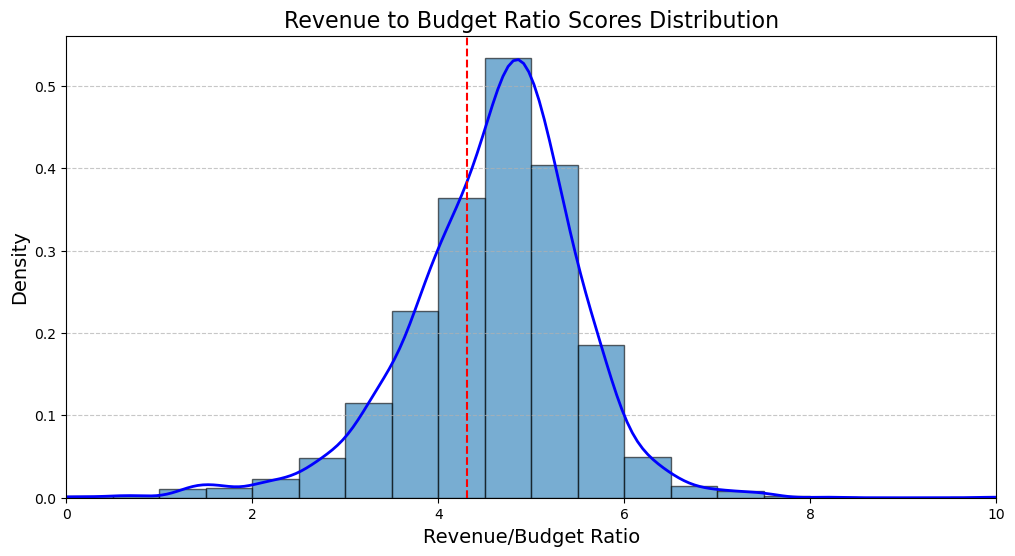

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.hist(clean_df['Normalized Revenue/Budget ratio'], bins=20, edgecolor='black', alpha=0.6, density=True)

# KDE plot
sns.kdeplot(data=clean_df, x='Normalized Revenue/Budget ratio', color='blue', linewidth=2)

plt.title('Revenue to Budget Ratio Scores Distribution', fontsize=16)
plt.xlabel('Revenue/Budget Ratio', fontsize=14)
plt.ylabel('Density', fontsize=14) 
plt.xlim((0, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axvline(x=(10*(0 - clean_df['Log Revenue/Budget ratio'].min()) / (clean_df['Log Revenue/Budget ratio'].max() - clean_df['Log Revenue/Budget ratio'].min())),
            color='red', linestyle='--') #Visualize break-even point
plt.show()

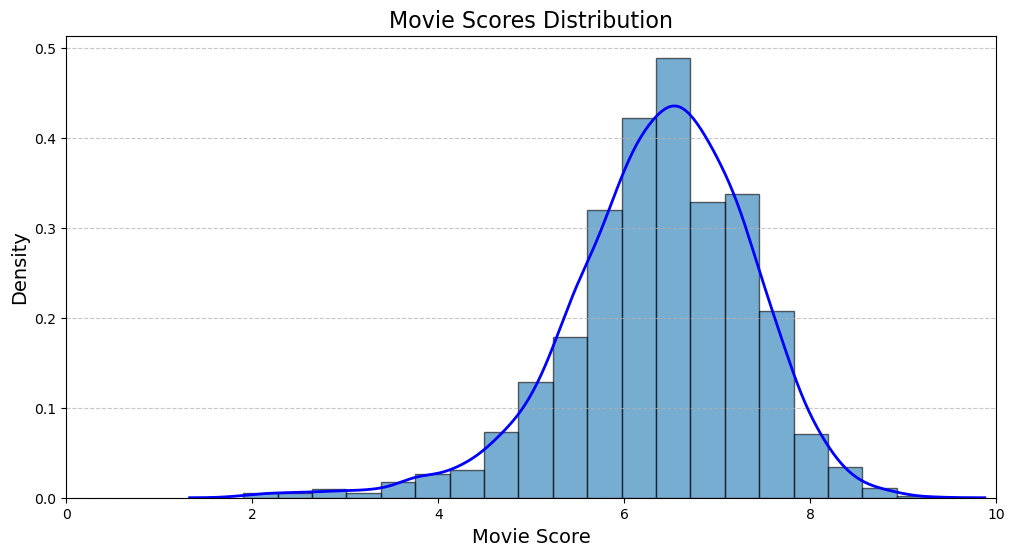

In [25]:
plt.figure(figsize=(12, 6))

plt.hist(clean_df['Movie score'], bins=20, edgecolor='black', alpha=0.6, density=True)

# KDE plot
sns.kdeplot(data=clean_df, x='Movie score', color='blue', linewidth=2)

plt.title('Movie Scores Distribution', fontsize=16)
plt.xlabel('Movie Score', fontsize=14)
plt.ylabel('Density', fontsize=14) 
plt.xlim((0, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [26]:
clean_df['Nomination Score'] = 1+ 9 * (
    (clean_df['Number of nomination'] - clean_df['Number of nomination'].min()) /
    (clean_df['Number of nomination'].max() - clean_df['Number of nomination'].min())
)
# put a score of 0 for movies with no nominations
clean_df['Nomination Score'].fillna(0, inplace=True)

clean_df.columns

/var/folders/kq/mj3vqpx92rs0wb718f9xfbm00000gn/T/ipykernel_24861/3523667255.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_df['Nomination Score'].fillna(0, inplace=True)


Index(['Freebase movie ID', 'Movie name', 'Movie release date',
       'Movie box office revenue', 'Movie runtime', 'Movie languages',
       'Movie countries', 'Movie genres', 'Movie score', 'Movie votes',
       'Movie director', 'Movie star', 'Movie budget', 'Movie gross',
       'Movie company', 'Number of nomination', 'Nomination winner',
       'Revenue/Budget ratio', 'Capped Revenue/Budget ratio',
       'Normalized Revenue/Budget ratio', 'Log Revenue/Budget ratio',
       'Nomination Score'],
      dtype='object')

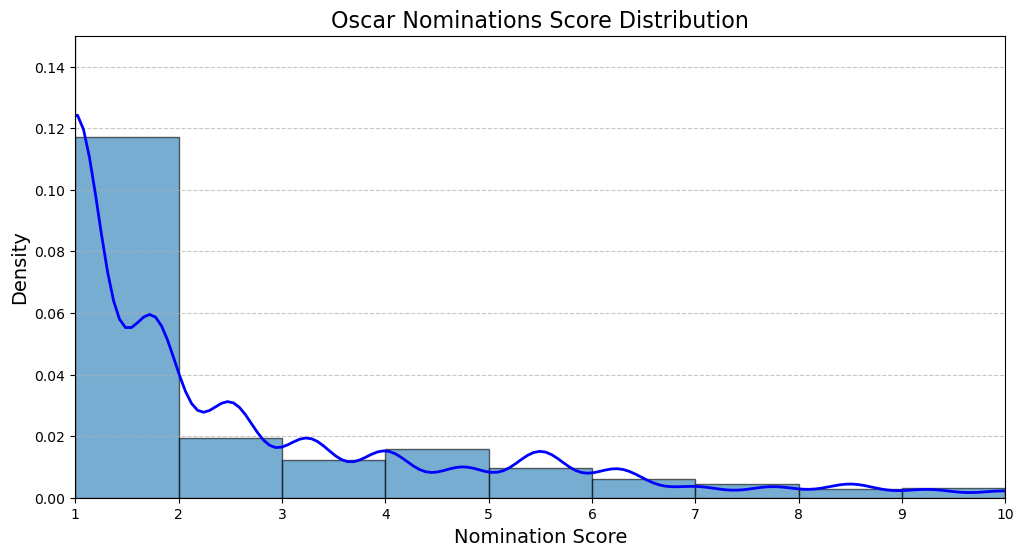

In [27]:
plt.figure(figsize=(12, 6))

plt.hist(clean_df['Nomination Score'], bins=10, edgecolor='black', alpha=0.6, density=True)

# KDE plot
sns.kdeplot(data=clean_df, x='Nomination Score', color='blue', linewidth=2)

plt.title('Oscar Nominations Score Distribution', fontsize=16)
plt.xlabel('Nomination Score', fontsize=14)
plt.ylabel('Density', fontsize=14) 
plt.xlim((1, 10))
plt.ylim((0,0.150))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [202]:
# For the moment we choose these weights
weight_popularity = 0.4
weight_revenue_ratio = 0.5
weight_nominations = 0.1


# Success index calc
clean_df['Success Index'] = (
    clean_df['Movie score'] * weight_popularity +
    clean_df['Normalized Revenue/Budget ratio'] * weight_revenue_ratio +
    clean_df['Nomination Score'] * weight_nominations 
)


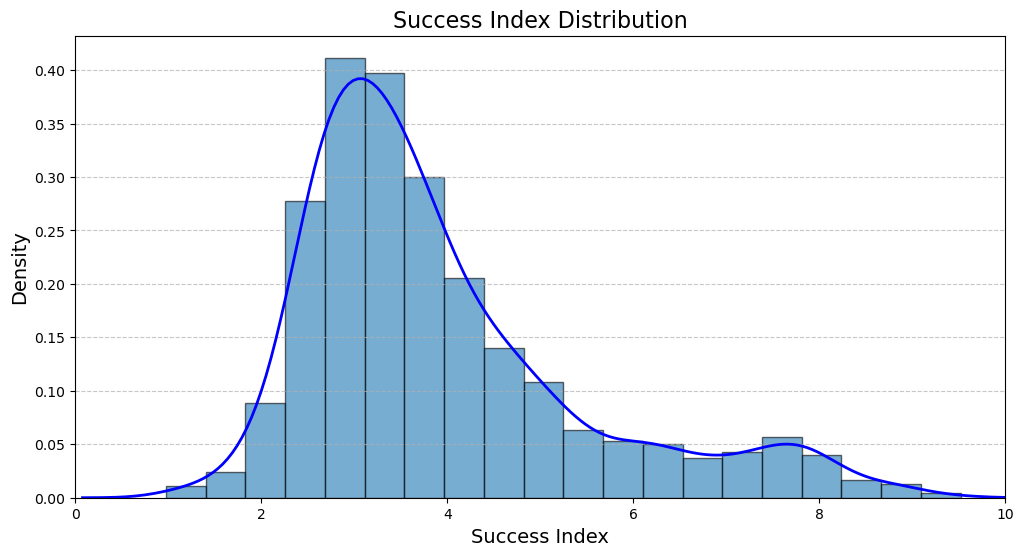

In [203]:
plt.figure(figsize=(12, 6))

plt.hist(clean_df['Success Index'], bins=20, edgecolor='black', alpha=0.6, density=True)

# KDE plot
sns.kdeplot(data=clean_df, x='Success Index', color='blue', linewidth=2)

plt.title('Success Index Distribution', fontsize=16)
plt.xlabel('Success Index', fontsize=14)
plt.ylabel('Density', fontsize=14) 
plt.xlim((0, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [204]:
clean_df.loc[clean_df['Success Index'] > 5].sort_values(by='Success Index', ascending= False).head(20)

,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie score,Movie votes,...,Movie budget,Movie gross,Movie company,Number of nomination,Nomination winner,Revenue/Budget ratio,Capped Revenue/Budget ratio,Normalized Revenue/Budget ratio,Nomination Score,Success Index
65287,/m/0bdjd,forrest_gump,1994,6.773877e+08,136.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Coming of age, Comedy film, Drama, War film, R...",8.8,1900000.0,...,55000000.0,6.782261e+08,Paramount Pictures,13.0,"Tom Hanks, Robert Zemeckis, Arthur Schmidt, We...",12.316140,9.974697,10.000000,10.00,9.520000
25386,/m/0hfzr,schindler's_list,1993,3.213063e+08,186.0,"{""/m/064_8sq"": ""French Language"", ""/m/05qqm"": ...",United States of America,"Tragedy, Biography, History, War film, Biopic ...",8.9,1200000.0,...,22000000.0,3.221612e+08,Universal Pictures,12.0,Art Direction: Allan Starski; Set Decoration...,14.604832,9.974697,10.000000,9.25,9.485000
80920,/m/017jd9,the_lord_of_the_rings:_the_return_of_the_king,2003,1.119930e+09,250.0,"{""/m/05p2d"": ""Old English language"", ""/m/02h40...","United States of America, New Zealand","Fantasy Adventure, Adventure, Epic, Action/Adv...",8.9,1700000.0,...,94000000.0,1.146031e+09,New Line Cinema,11.0,Art Direction: Grant Major; Set Decoration: Da...,11.914144,9.974697,10.000000,8.50,9.410000
79973,/m/017gl1,the_lord_of_the_rings:_the_fellowship_of_the_ring,2001,8.715303e+08,178.0,"{""/m/02h40lc"": ""English Language""}","United States of America, New Zealand","Fantasy Adventure, Adventure, Epic, Fantasy, F...",8.8,1700000.0,...,93000000.0,8.976901e+08,New Line Cinema,13.0,"Andrew Lesnie, Peter Owen, Richard Taylor, How...",9.371294,9.371294,9.394954,10.00,9.217477
13423,/m/0y_9q,dances_with_wolves,1990,4.242088e+08,224.0,"{""/m/0565z6"": ""Sioux language"", ""/m/06dqgy"": ""...","United States of America, United Kingdom","Adventure, Epic Western, Costume drama, Indian...",8.0,247000.0,...,22000000.0,4.242088e+08,Tig Productions,12.0,"Dean Semler, Kevin Costner, Neil Travis, John ...",19.282220,9.974697,10.000000,9.25,9.125000
66299,/m/0f4_l,pulp_fiction,1994,2.139288e+08,168.0,"{""/m/064_8sq"": ""French Language"", ""/m/02h40lc""...",United States of America,"Crime Fiction, Thriller, Crime Comedy, Indie, ...",8.9,1900000.0,...,8000000.0,2.139288e+08,Miramax,7.0,Screenplay by Quentin Tarantino; Stories by Q...,26.741095,9.974697,10.000000,5.50,9.110000
32690,/m/011ypx,good_will_hunting,1997,2.259334e+08,126.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Drama, Romantic drama, Romance Film, Coming of...",8.3,887000.0,...,10000000.0,2.259334e+08,Miramax,9.0,"Robin Williams, Ben Affleck, Matt Damon",22.593343,9.974697,10.000000,7.00,9.020000
15633,/m/07cyl,the_silence_of_the_lambs,1991,2.727429e+08,118.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Thriller, LGBT, Horror, Psychological thriller...",8.6,1300000.0,...,19000000.0,2.727429e+08,Strong Heart/Demme Production,7.0,"Anthony Hopkins, Jodie Foster, Jonathan Demme,...",14.354891,9.974697,10.000000,5.50,8.990000
56805,/m/0_92w,unforgiven,1992,1.591574e+08,131.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Western, Drama",8.2,385000.0,...,14400000.0,1.591574e+08,Warner Bros.,9.0,"Gene Hackman, Clint Eastwood, Joel Cox, Clint ...",11.052600,9.974697,10.000000,7.00,8.980000
22290,/m/03hmt9b,slumdog_millionaire,2008,3.779105e+08,120.0,"{""/m/03k50"": ""Hindi Language"", ""/m/064_8sq"": ""...",United Kingdom,"Thriller, Crime Fiction, Indie, Inspirational ...",8.0,812000.0,...,15000000.0,3.784105e+08,Celador Films,10.0,"Anthony Dod Mantle, Danny Boyle, Chris Dickens...",25.194036,9.974697,10.000000,7.75,8.975000


In [205]:
clean_df.loc[clean_df['Movie name'] == 'avatar' ]

,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie score,Movie votes,...,Movie budget,Movie gross,Movie company,Number of nomination,Nomination winner,Revenue/Budget ratio,Capped Revenue/Budget ratio,Normalized Revenue/Budget ratio,Nomination Score,Success Index
23702,/m/0bth54,avatar,2009,2.782275e+09,178.0,"{""/m/02h40lc"": ""English Language"", ""/m/06nm1"":...","United States of America, United Kingdom","Thriller, Science Fiction, Adventure, Computer...",7.8,1100000.0,...,237000000.0,2.847246e+09,Twentieth Century Fox,9.0,Production Design: Rick Carter and Robert Stro...,11.739558,9.974697,10.0,7.0,8.82


In [206]:
# Checking correlation with relevant features we chose
correlation_with_gross = clean_df['Success Index'].corr(clean_df['Movie box office revenue'], method='pearson')
print("Correlation with Box Office Gross:", correlation_with_gross)
correlation_with_pop = clean_df['Success Index'].corr(clean_df['Movie score'], method='pearson')
print("Correlation with Popularity:", correlation_with_pop)
correlation_with_oscar = clean_df['Success Index'].corr(clean_df['Number of nomination'], method='pearson')
print("Correlation with Oscar Nominations:", correlation_with_oscar)



Correlation with Box Office Gross: 0.4552539694580451
Correlation with Popularity: 0.5327928499088405
Correlation with Oscar Nominations: 0.42928557403446005


In [207]:

import statsmodels.api as sm

# Check if we can predict well box office revenue with our index
X = sm.add_constant(clean_df['Success Index'])  
Y = clean_df['Movie box office revenue']

model = sm.OLS(Y, X).fit()
print(model.summary())


                               OLS Regression Results                               
Dep. Variable:     Movie box office revenue   R-squared:                       0.207
Model:                                  OLS   Adj. R-squared:                  0.207
Method:                       Least Squares   F-statistic:                     924.2
Date:                      Mon, 11 Nov 2024   Prob (F-statistic):          1.54e-180
Time:                              11:12:26   Log-Likelihood:                -71195.
No. Observations:                      3537   AIC:                         1.424e+05
Df Residuals:                          3535   BIC:                         1.424e+05
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

## Actor group analysis



In [208]:
success_threshold = 7

# take all the clean df that have more than 7 as a sucess index
print(f'Based on the weights we chose, we have {clean_df.loc[clean_df["Success Index"] >= success_threshold].shape[0]} movies with a success index greater than 7')

# select the movies based on the freebase movie ID to be able to merge with the cprresponding actors in characters.metadata.tsv
freebase_movie_id_successful = clean_df.loc[(clean_df['Success Index'] >= success_threshold)].sort_values(by='Movie release date', ascending= True)['Freebase movie ID']

Based on the weights we chose, we have 252 movies with a success index greater than 7


In [209]:
character_data = pd.read_csv('data/character.metadata.tsv',
                             sep='\t', 
                             names= ['Wikipedia movie ID', 'Freebase movie ID', 'Movie release date', 'Character name', 'Actor date of birth', 'Actor gender', 
                                        'Actor height', 'Actor ethnicity', 'Actor name', 'Actor age at movie release', 'Freebase character/actor map ID', 'Freebase character ID', 'Freebase actor ID'])

successful_actor_data = character_data[character_data['Freebase movie ID'].isin(freebase_movie_id_successful)]

print(f'Based on the successful movies we selected, we have {successful_actor_data.shape[0]} actors that played in these movies (can be duplicated if they played in multiple movies).')

Based on the successful movies we selected, we have 3971 actors that played in these movies (can be duplicated if they played in multiple movies).


In [210]:
# actors that played in multiple movies
multiple_movie_actors = successful_actor_data['Actor name'].value_counts().loc[lambda x: x > 1]
print(f"We have {multiple_movie_actors.shape[0]} actors who have appeared in multiple movies in our selection.")


#get a dataframe with only the actors that played in multiple movies
multiple_movie_actors_df = successful_actor_data[successful_actor_data['Actor name'].isin(multiple_movie_actors.index)]


# acrors that played in only one movie
single_movie_actors = successful_actor_data['Actor name'].value_counts().loc[lambda x: x == 1]
print(f"We have {single_movie_actors.shape[0]} actors who appeared in only one movie in our selection.")

# get a dataframe with only the actors that played in a single movie
single_movie_actors_df  = successful_actor_data[successful_actor_data['Actor name'].isin(single_movie_actors.index)]
single_movie_actors_df

# define unsuccessful movies and actors in those movies
unsuccessful_movies = clean_df[clean_df['Success Index'] < success_threshold]
unsuccessful_movie_ids = unsuccessful_movies['Freebase movie ID']
unsuccessful_actors = character_data[character_data['Freebase movie ID'].isin(unsuccessful_movie_ids)]

# identify single-movie actors who also appeared in unsuccessful movies
unsuccessful_actor_names = unsuccessful_actors['Actor name'].unique()
single_movie_unsuccessful_actor_names = set(single_movie_actors.index).intersection(unsuccessful_actor_names)

#  define a dataframe with only the actors that played in a single movie and also appeared in unsuccessful movies 
single_movie_unsuccessful_actor_df = character_data[character_data['Actor name'].isin(single_movie_unsuccessful_actor_names)]

print(f"We found {len(single_movie_unsuccessful_actor_names)} actors who played in only one successful movie but also appeared in unsuccessful movies.")



We have 482 actors who have appeared in multiple movies in our selection.
We have 2790 actors who appeared in only one movie in our selection.
We found 1544 actors who played in only one successful movie but also appeared in unsuccessful movies.
